### Density estimation : Parametric and Non-parametric

Parametric = you can guess the distribution (gaussian, exponential) but need to find exact parameters

Non-parametric = you do not know anything

In [2]:
import matplotlib.pyplot as plt 
from scipy.stats import gamma, beta, t


## Parametric

### Beta fit for Beta-generated data

In [3]:
a = 5
b = 2
loc=0
scale = 1

data=beta.rvs(a, b ,loc=loc,scale=scale,size=10)
print(data)
# α , β, loc (lower limit), scale (upper limit - lower limit)

[0.75658166 0.98544736 0.47165056 0.8685434  0.7071393  0.73209885
 0.78084658 0.47550383 0.50056491 0.85262902]


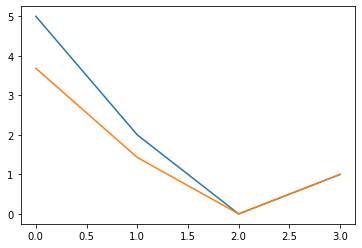

In [4]:
actual_a, actual_b, actual_loc, actual_scale = beta.fit(data, floc=loc, fscale=scale)

plt.plot([a, b, loc, scale], label='desired')
plt.plot([actual_a, actual_b, actual_loc, actual_scale], label='actual')
plt.show()

### Kolmogorov-Smirnov one-sided test to check goodness of fit

requires continuous distribution
<br>

tables for interpretation on critical value (ks)
<br>
reject the null hypothesis that the sample was drawn from the distribution if the p-value is less than your significance level
<br>
The D statistic is comparing CDF.  Closer it is to zero, the more likely it is that the two samples were drawn from the same distribution.

In [5]:
from scipy.stats import kstest

ks, p_value = kstest(data, 'norm', args=(actual_a, actual_b))
print(ks, p_value)

0.9705077263909724 9.956633908381746e-16


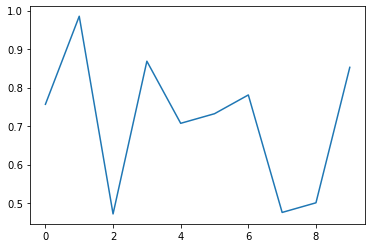

In [6]:
plt.plot(data)
plt.show()

### Beta for random data

In [7]:

data = [5, 12, 22, 400, 800, 120, 70, 30, 23, 22, 10, 1 ]

actual_a, actual_b, actual_loc, actual_scale = beta.fit(data)

print(actual_a, actual_b, actual_loc, actual_scale)

0.13941265318308266 0.49629629823818583 0.9999999999999999 832.731192541219


/home/sandeep/miniconda3/envs/sdv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


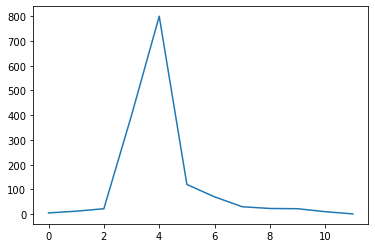

In [8]:
plt.plot(data)
plt.show()

### Kolmogorov-Smirnov one-sided test to check goodness of fit

In [9]:
from scipy.stats import kstest

ks, p_value = kstest(data, 'norm', args=(actual_a, actual_b))
print(ks, p_value)

0.9585426683070765 5.1552075052019556e-17


statistical power and restrictions of every test

https://en.wikipedia.org/wiki/Power_of_a_test

## Non-parametric

Use when you do not know the distribution 


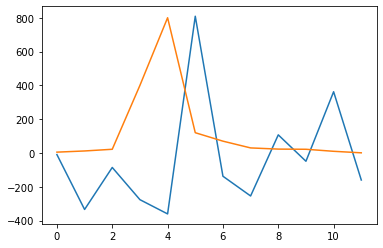

In [10]:
from scipy import stats
import numpy as np

kernel = stats.gaussian_kde(data, bw_method=1)
Y_new = kernel.resample(len(data))


plt.plot(Y_new[0], label='new')
plt.plot(data, label='old')
plt.show()